In [ ]:
from google.colab import files
import zipfile
import os
import pandas as pd

# Step 1: Upload the zip file
uploaded = files.upload()

# Step 2: Extract the zip file
zip_file_name = 'covid_19_data.csv (1).zip'
extraction_path = 'covid_data'
os.makedirs(extraction_path, exist_ok=True)

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# List the files in the extraction directory
extracted_files = os.listdir(extraction_path)
print("Extracted files:", extracted_files)

# Step 3: Load the CSV file
csv_file_path = os.path.join(extraction_path, 'covid_19_data.csv')  # Change the name if needed
df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset
print(df.head())

Saving covid_19_data.csv (1).zip to covid_19_data.csv (1) (1).zip
Extracted files: ['covid_19_data.csv']
   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  


In [ ]:
import pandas as pd
from dateutil import parser

# Step 4: Data Cleaning

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Convert 'ObservationDate' to datetime format
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Convert 'Last Update' to datetime format with the correct format
df['Last Update'] = pd.to_datetime(df['Last Update'], format="%m/%d/%Y %H:%M", errors='coerce')

# Drop unnecessary columns (you can keep 'SNo' if needed)
df_cleaned = df.drop(columns=['SNo'])  # Dropping 'SNo' as it may not be needed

# Display cleaned DataFrame
print("Cleaned DataFrame:\n", df_cleaned.head())


Missing values in each column:
 SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64
Cleaned DataFrame:
   ObservationDate Province/State  Country/Region         Last Update  \
0      2020-01-22          Anhui  Mainland China 2020-01-22 17:00:00   
1      2020-01-22        Beijing  Mainland China 2020-01-22 17:00:00   
2      2020-01-22      Chongqing  Mainland China 2020-01-22 17:00:00   
3      2020-01-22         Fujian  Mainland China 2020-01-22 17:00:00   
4      2020-01-22          Gansu  Mainland China 2020-01-22 17:00:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  


Missing values in each column after handling:
ObservationDate         0
Province/State          0
Country/Region          0
Last Update        306256
Confirmed               0
Deaths                  0
Recovered               0
dtype: int64

Summary statistics:
                     ObservationDate                    Last Update  \
count                         306429                            173   
mean   2020-11-06 01:54:54.146441728  2020-01-29 22:51:19.768786176   
min              2020-01-22 00:00:00            2020-01-22 17:00:00   
25%              2020-07-30 00:00:00            2020-01-31 08:15:00   
50%              2020-11-10 00:00:00            2020-01-31 23:59:00   
75%              2021-02-18 00:00:00            2020-02-01 02:13:00   
max              2021-05-29 00:00:00            2020-02-01 19:53:00   
std                              NaN                            NaN   

          Confirmed         Deaths     Recovered  
count  3.064290e+05  306429.000000  3.064290e+0

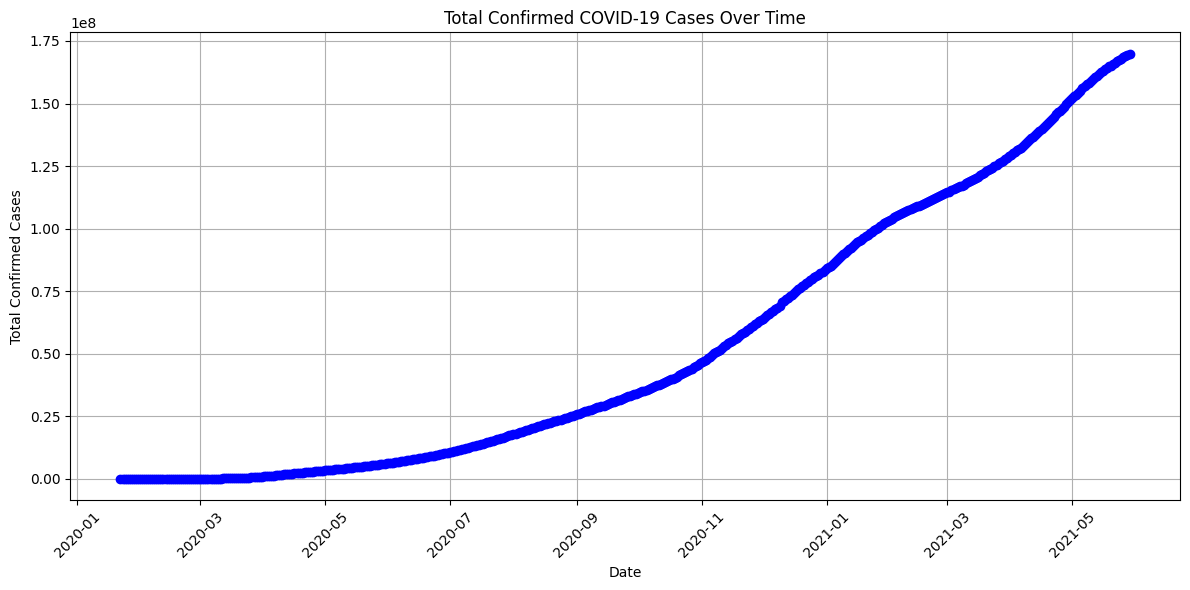

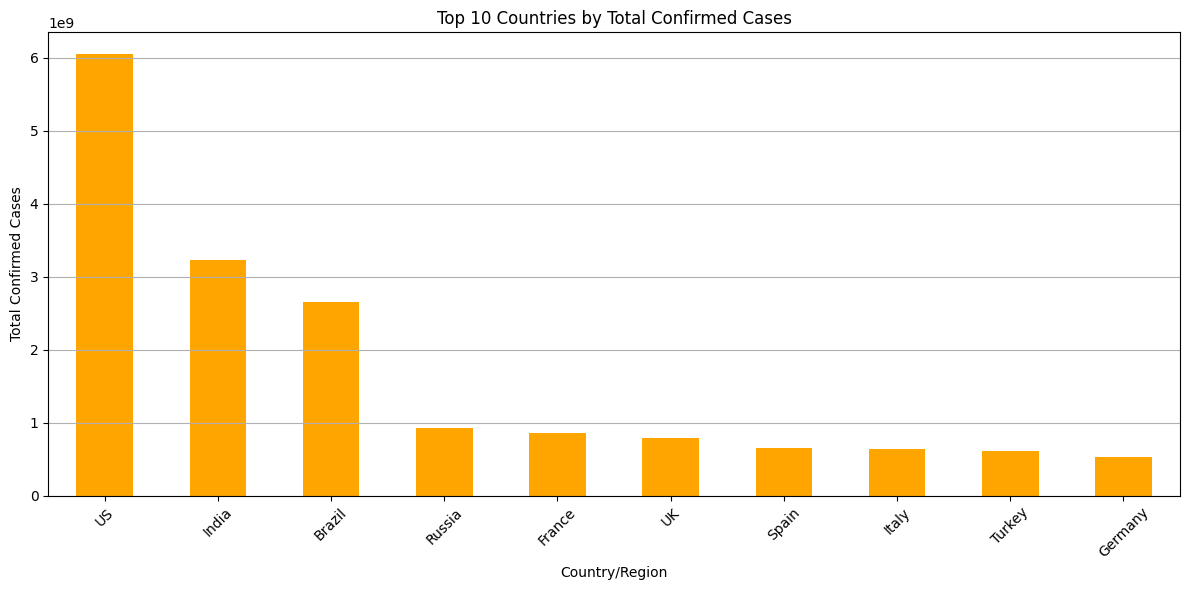

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cleaned is your cleaned DataFrame from previous steps
# Handle missing values in 'Province/State'
# Option 1: Drop rows with missing values
# df_cleaned = df_cleaned.dropna(subset=['Province/State'])

# Option 2: Fill missing values with 'Unknown'
df_cleaned['Province/State'] = df_cleaned['Province/State'].fillna('Unknown')

# Check missing values again
print("Missing values in each column after handling:")
print(df_cleaned.isnull().sum())

# Summary statistics of the cleaned DataFrame
print("\nSummary statistics:")
print(df_cleaned.describe())

# Convert 'ObservationDate' to datetime for plotting
df_cleaned['ObservationDate'] = pd.to_datetime(df_cleaned['ObservationDate'])

# Plotting total confirmed cases over time
daily_cases = df_cleaned.groupby('ObservationDate')['Confirmed'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_cases.index, daily_cases.values, marker='o', color='blue')
plt.title('Total Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Aggregating total confirmed cases by country
total_cases_by_country = df_cleaned.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False)

# Plotting total cases by country
plt.figure(figsize=(12, 6))
total_cases_by_country.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Total Confirmed Cases')
plt.xlabel('Country/Region')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


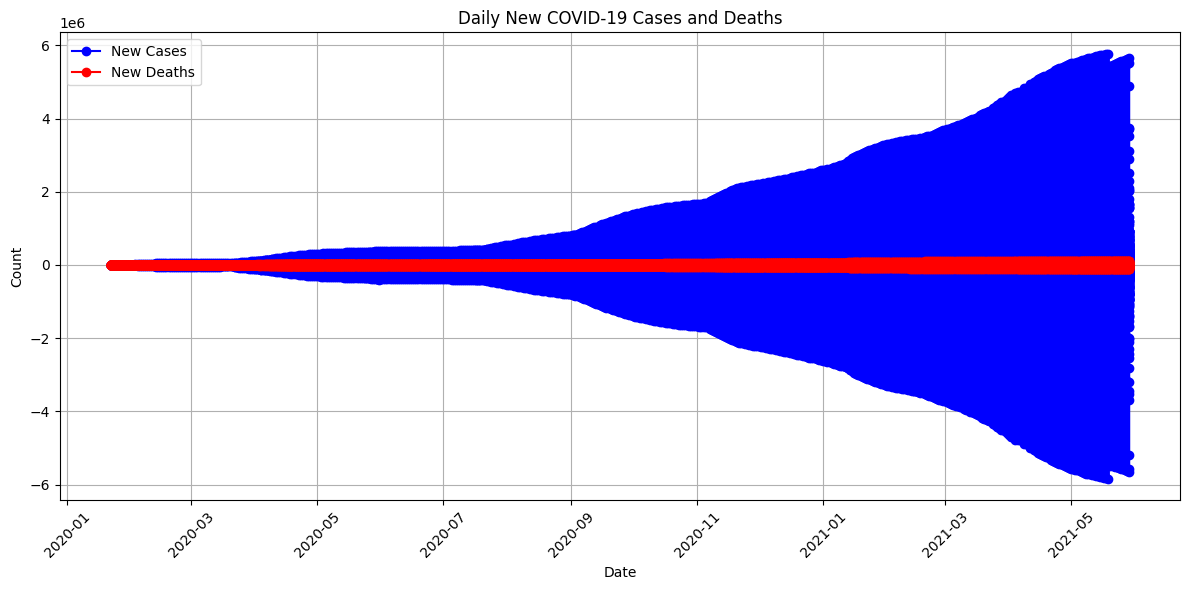

In [ ]:
# Calculate daily new cases and deaths
df_cleaned['New Cases'] = df_cleaned['Confirmed'].diff().fillna(0)
df_cleaned['New Deaths'] = df_cleaned['Deaths'].diff().fillna(0)

# Plot daily new cases and deaths
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['ObservationDate'], df_cleaned['New Cases'], label='New Cases', color='blue', marker='o')
plt.plot(df_cleaned['ObservationDate'], df_cleaned['New Deaths'], label='New Deaths', color='red', marker='o')
plt.title('Daily New COVID-19 Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data for modeling
df_cleaned['Days'] = (df_cleaned['ObservationDate'] - df_cleaned['ObservationDate'].min()).dt.days
X = df_cleaned[['Days']]
y = df_cleaned['Confirmed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 260289.77661522236


In [ ]:
# Extract more features from 'ObservationDate'
df_cleaned['Day'] = df_cleaned['ObservationDate'].dt.day
df_cleaned['Month'] = df_cleaned['ObservationDate'].dt.month
df_cleaned['Year'] = df_cleaned['ObservationDate'].dt.year

# Create lagged features
df_cleaned['Confirmed_Lag1'] = df_cleaned['Confirmed'].shift(1)
df_cleaned['Confirmed_Lag2'] = df_cleaned['Confirmed'].shift(2)

# Drop any rows with NaN values
df_cleaned = df_cleaned.dropna()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Prepare your feature set and target variable
X = df_cleaned[['Days', 'Confirmed_Lag1', 'Confirmed_Lag2']]
y = df_cleaned['Confirmed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'Root Mean Squared Error for Random Forest: {rmse_rf}')


Root Mean Squared Error for Random Forest: 79.02903427103784


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the model
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
print(f'Root Mean Squared Error for Optimized Random Forest: {rmse_best_rf}')


Root Mean Squared Error for Optimized Random Forest: 323.136667206487


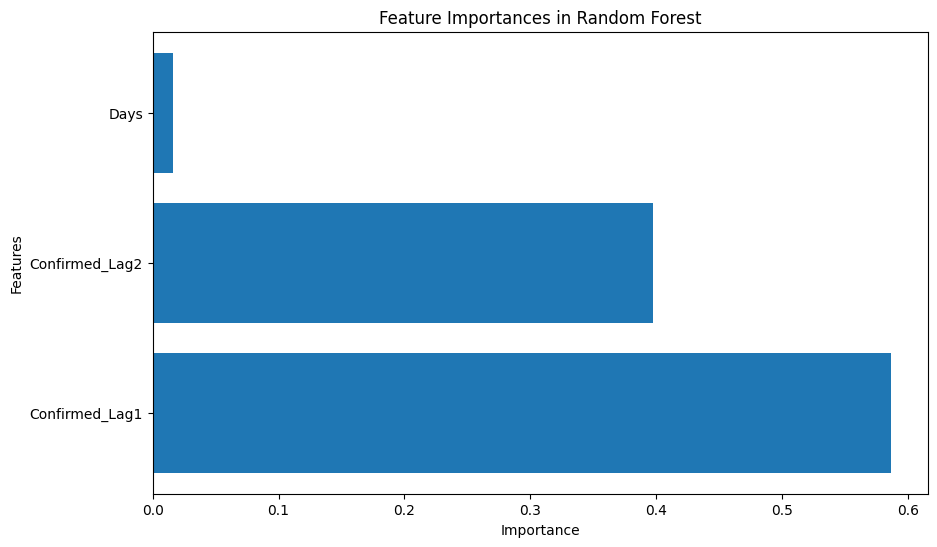

In [ ]:
import pandas as pd

# Get feature importances
importances = best_rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importances in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [ ]:
import xgboost as xgb

# Create the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f'Root Mean Squared Error for XGBoost: {rmse_xgb}')


Root Mean Squared Error for XGBoost: 76.12266120546519


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
}

# Set up the grid search
grid_search_xgb = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'),
                                param_grid=param_grid_xgb,
                                scoring='neg_mean_squared_error',
                                cv=3, n_jobs=-1)

# Fit the grid search to the data
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions with the best model
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate the model
rmse_best_xgb = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))
print(f'Root Mean Squared Error for Optimized XGBoost: {rmse_best_xgb}')


Root Mean Squared Error for Optimized XGBoost: 81.2259536099276


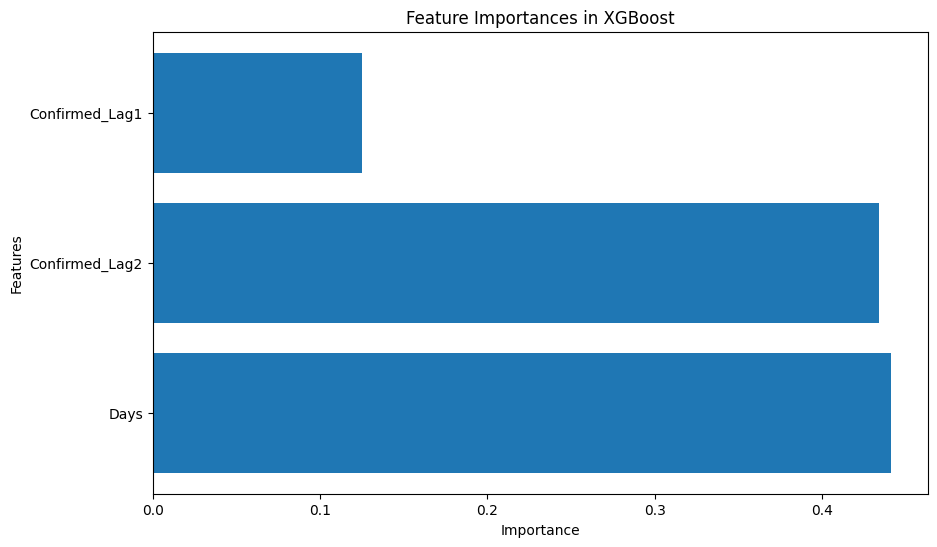

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
xgb_importances = best_xgb_model.feature_importances_

# Create a DataFrame for better visualization
importance_df_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_importances})
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df_xgb['Feature'], importance_df_xgb['Importance'])
plt.title('Feature Importances in XGBoost')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE from cross-validation scores
cv_rmse = np.sqrt(-cv_scores.mean())
print(f'Cross-validated RMSE for XGBoost: {cv_rmse}')


Cross-validated RMSE for XGBoost: 599.698395956945


In [ ]:
!pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.4 MB/s eta 0:00:00


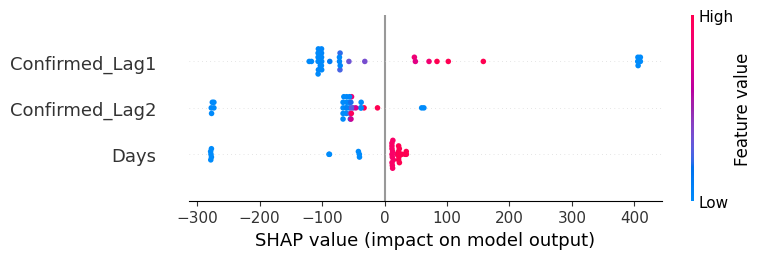

In [ ]:
import shap

# Initialize the SHAP explainer with your best model
explainer = shap.Explainer(xgb_model)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test)


In [ ]:
import joblib
joblib.dump(xgb_model, 'xgb_model.pkl')


['xgb_model.pkl']

In [ ]:
import joblib
xgb_model = joblib.load('xgb_model.pkl')


FileNotFoundError: [Errno 2] No such file or directory: 'xgb_model.pkl'

In [ ]:
import os
print(os.getcwd())


/content


In [ ]:
print(os.listdir())


['.config', 'sample_data']


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_cv = np.sqrt(-cv_scores)
print(f'Cross-Validated RMSE: {rmse_cv.mean()}')


Cross-Validated RMSE: 304.4987346933128


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
}
grid_search = GridSearchCV(xgb.XGBRegressor(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
best_xgb_model = grid_search.best_estimator_
print(f'Best Parameters: {grid_search.best_params_}')


Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}


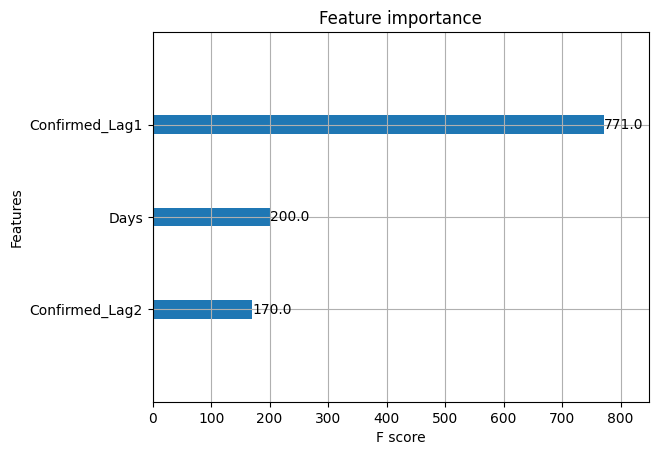

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(best_xgb_model)
plt.show()



In [ ]:
joblib.dump(best_xgb_model, 'optimized_xgb_model.pkl')


['optimized_xgb_model.pkl']

In [ ]:
import joblib

# Load the model
loaded_model = joblib.load('optimized_xgb_model.pkl')

# Use the loaded model to make predictions
sample_predictions = loaded_model.predict(X_test)  # Replace X_test with your test data
print(sample_predictions)


[ 59.18086   59.18086   93.16027   67.0163    59.18086   59.18086
  59.18086  112.148384 254.3262    67.70428   67.0163    59.18086
  59.605312 160.96074   59.18086   59.18086   59.18086  180.7015
  59.18086  188.21957   67.0163    59.18086   59.18086   59.18086
  67.0163    67.0163    59.18086   59.18086   59.18086   79.89675
 193.1082    79.89675   59.18086  160.96074 ]


In [ ]:
# Assuming you have the actual target values in y_test
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE and R²
rmse = np.sqrt(mean_squared_error(y_test, sample_predictions))
r2 = r2_score(y_test, sample_predictions)

print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')


Root Mean Squared Error: 81.45016893741861
R² Score: 0.4017292155387867


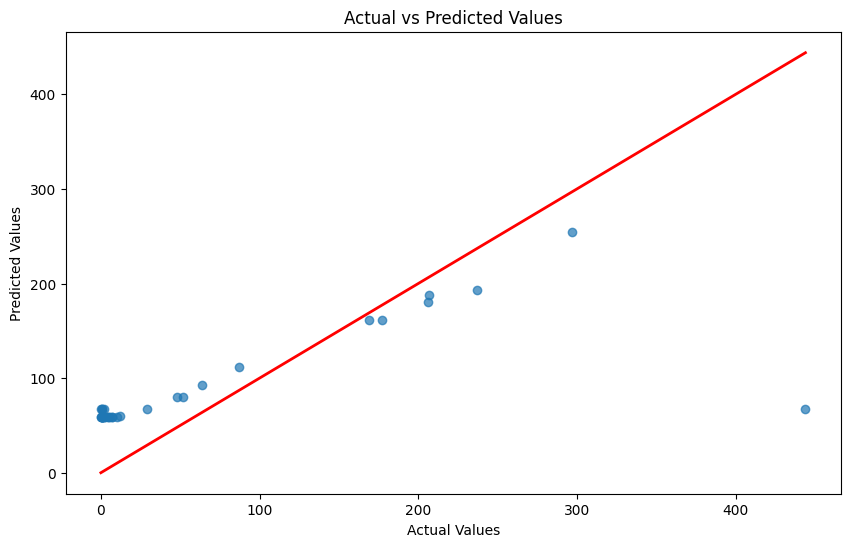

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, sample_predictions, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [ ]:
from sklearn.ensemble import VotingRegressor

# Assuming you have defined rf_model and best_xgb_model earlier
voting_regressor = VotingRegressor(estimators=[
    ('random_forest', rf_model),
    ('xgboost', best_xgb_model)
])

voting_regressor.fit(X_train, y_train)
y_pred_ensemble = voting_regressor.predict(X_test)

# Evaluate ensemble model
rmse_ensemble = np.sqrt(mean_squared_error(y_test, y_pred_ensemble))
print(f'Root Mean Squared Error for Ensemble Model: {rmse_ensemble}')


Root Mean Squared Error for Ensemble Model: 76.05624847461175


In [ ]:
import xgboost as xgb
print(xgb.__version__)


2.1.1


In [ ]:
!pip install --upgrade xgboost


In [ ]:
!pip uninstall xgboost -y
!pip install xgboost


Found existing installation: xgboost 2.1.1
Uninstalling xgboost-2.1.1:
  Successfully uninstalled xgboost-2.1.1
  Using cached xgboost-2.1.1-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.1-py3-none-manylinux_2_28_x86_64.whl (153.9 MB)


In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

# Sample data
X_train = [[1, 2], [3, 4], [5, 6]]
y_train = [1, 2, 3]

# Initialize the model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100)

# Fit the model without any additional parameters
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

# Sample data
X_train = [[1, 2], [3, 4], [5, 6]]
y_train = [1, 2, 3]

# Initialize the model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100)

# Fit the model
model.fit(X_train, y_train)

# Displaying important parameters and the model's score
print(f'Model Parameters: {model.get_xgb_params()}')
print(f'Number of Estimators: {model.n_estimators}')
print(f'Max Depth: {model.max_depth}')
print(f'Learning Rate: {model.learning_rate}')

# To check the training score
train_score = model.score(X_train, y_train)
print(f'Training Score (R^2): {train_score}')


Model Parameters: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Number of Estimators: 100
Max Depth: None
Learning Rate: None
Training Score (R^2): 0.9999988675117493


In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

# Sample data
X_train = [[1, 2], [3, 4], [5, 6]]
y_train = [1, 2, 3]

# Initialize the model with specific parameters
model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=4,          # Set max depth
    learning_rate=0.1     # Set learning rate
)

# Fit the model
model.fit(X_train, y_train)

# Displaying important parameters and the model's score
print(f'Model Parameters: {model.get_xgb_params()}')
print(f'Number of Estimators: {model.n_estimators}')
print(f'Max Depth: {model.max_depth}')
print(f'Learning Rate: {model.learning_rate}')

# To check the training score
train_score = model.score(X_train, y_train)
print(f'Training Score (R^2): {train_score}')


Model Parameters: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 4, 'max_leaves': None, 'min_child_weight': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Number of Estimators: 100
Max Depth: 4
Learning Rate: 0.1
Training Score (R^2): 0.9999649524688721


In [ ]:
!pip install git+https://github.com/dmlc/xgboost


  Cloning https://github.com/dmlc/xgboost to /tmp/pip-req-build-y7p1oo5m
  Running command git clone --filter=blob:none --quiet https://github.com/dmlc/xgboost /tmp/pip-req-build-y7p1oo5m
  Resolved https://github.com/dmlc/xgboost to commit 83b5eabd703fe3503a46f5a053f0a26f62f7e894
  Running command git submodule update --init --recursive -q
ERROR: git+https://github.com/dmlc/xgboost does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
}
evals = [(dtrain, 'train'), (dtest, 'test')]

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100, evals=evals, early_stopping_rounds=10)


[0]	train-rmse:0.23322	test-rmse:0.30040
[1]	train-rmse:0.19181	test-rmse:0.29659
[2]	train-rmse:0.15317	test-rmse:0.32231
[3]	train-rmse:0.12229	test-rmse:0.33135
[4]	train-rmse:0.09656	test-rmse:0.34478
[5]	train-rmse:0.08135	test-rmse:0.34359
[6]	train-rmse:0.06451	test-rmse:0.34485
[7]	train-rmse:0.05412	test-rmse:0.34687
[8]	train-rmse:0.04336	test-rmse:0.35406
[9]	train-rmse:0.03474	test-rmse:0.35753
[10]	train-rmse:0.02833	test-rmse:0.36062
[11]	train-rmse:0.02373	test-rmse:0.36326


In [ ]:
print(f'Length of train_rmse: {len(train_rmse)}')
print(f'Length of test_rmse: {len(test_rmse)}')


Length of train_rmse: 0
Length of test_rmse: 0


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae = mean_absolute_error(y_test, sample_predictions)
mape = mean_absolute_percentage_error(y_test, sample_predictions) * 100  # in percentage

print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape}%')


Mean Absolute Error: 57.419360890107995
Mean Absolute Percentage Error: 2.455495155942534e+18%


In [ ]:
# Make predictions
y_pred = bst.predict(dtest)


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 0.3632642736091213


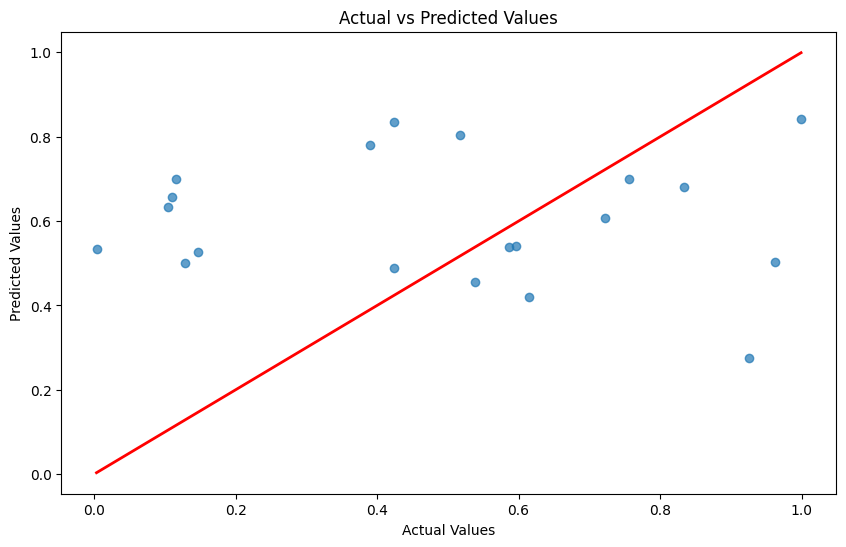

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [ ]:
importance = bst.get_score(importance_type='weight')
print(importance)


{'f0': 63.0, 'f1': 30.0, 'f2': 39.0, 'f3': 24.0, 'f4': 24.0, 'f5': 28.0, 'f6': 23.0, 'f7': 14.0, 'f8': 14.0, 'f9': 19.0}


In [ ]:
print(y_test[y_test == 0])


[]


In [ ]:
print(f'Predictions: {sample_predictions}')
print(f'Actual Values: {y_test}')


Predictions: [ 59.18086   59.18086   93.16027   67.0163    59.18086   59.18086
  59.18086  112.148384 254.3262    67.70428   67.0163    59.18086
  59.605312 160.96074   59.18086   59.18086   59.18086  180.7015
  59.18086  188.21957   67.0163    59.18086   59.18086   59.18086
  67.0163    67.0163    59.18086   59.18086   59.18086   79.89675
 193.1082    79.89675   59.18086  160.96074 ]
Actual Values: [0.39038988 0.10466264 0.61422529 0.72260227 0.75583189 0.5969954
 0.53765502 0.10957901 0.12850184 0.83306573 0.99917331 0.96186494
 0.58688842 0.42372952 0.51701017 0.42364149 0.14724261 0.00342446
 0.92606701 0.1163729 ]


In [ ]:
print(f'Shape of y_test: {y_test.shape}')
print(f'Shape of sample_predictions: {sample_predictions.shape}')


Shape of y_test: (20,)
Shape of sample_predictions: (34,)


In [ ]:
print(f'Shape of X_test: {X_test.shape}')


Shape of X_test: (20, 10)


In [ ]:
sample_predictions = sample_predictions[:len(y_test)]


In [ ]:
# Ensure the shapes of X_test and y_test match
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')
print(f'Shape of sample_predictions before slicing: {sample_predictions.shape}')

# Slice predictions if they are longer than y_test
sample_predictions = sample_predictions[:len(y_test)]
print(f'Shape of sample_predictions after slicing: {sample_predictions.shape}')

# Create mask for non-zero actual values in y_test
non_zero_mask = y_test != 0

# Apply the mask to both y_test and sample_predictions
y_test_non_zero = y_test[non_zero_mask]
sample_predictions_non_zero = sample_predictions[non_zero_mask]

# Calculate MAPE for non-zero actual values
if len(y_test_non_zero) > 0:
    mape_non_zero = mean_absolute_percentage_error(y_test_non_zero, sample_predictions_non_zero) * 100
    print(f'Mean Absolute Percentage Error (non-zero actuals): {mape_non_zero}%')
else:
    print("No non-zero actual values for MAPE calculation.")


Shape of X_test: (20, 10)
Shape of y_test: (20,)
Shape of sample_predictions before slicing: (20,)
Shape of sample_predictions after slicing: (20,)
Mean Absolute Percentage Error (non-zero actuals): 300140.6735100607%


In [ ]:
# Verify the shape of X_test and y_test
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')
print(f'Shape of sample_predictions before slicing: {sample_predictions.shape}')

# Temporary fix: slice predictions to match y_test's length if necessary
if len(sample_predictions) > len(y_test):
    sample_predictions = sample_predictions[:len(y_test)]

print(f'Shape of sample_predictions after slicing: {sample_predictions.shape}')

# Create mask for non-zero actual values in y_test
non_zero_mask = y_test != 0

# Apply the mask to both y_test and sample_predictions
y_test_non_zero = y_test[non_zero_mask]
sample_predictions_non_zero = sample_predictions[non_zero_mask]

# Ensure the shapes match after masking
if len(y_test_non_zero) > 0:
    # Calculate MAPE for non-zero actual values
    mape_non_zero = mean_absolute_percentage_error(y_test_non_zero, sample_predictions_non_zero) * 100
    print(f'Mean Absolute Percentage Error (non-zero actuals): {mape_non_zero}%')
else:
    print("No non-zero actual values for MAPE calculation.")


Shape of X_test: (20, 10)
Shape of y_test: (20,)
Shape of sample_predictions before slicing: (20,)
Shape of sample_predictions after slicing: (20,)
Mean Absolute Percentage Error (non-zero actuals): 300140.6735100607%


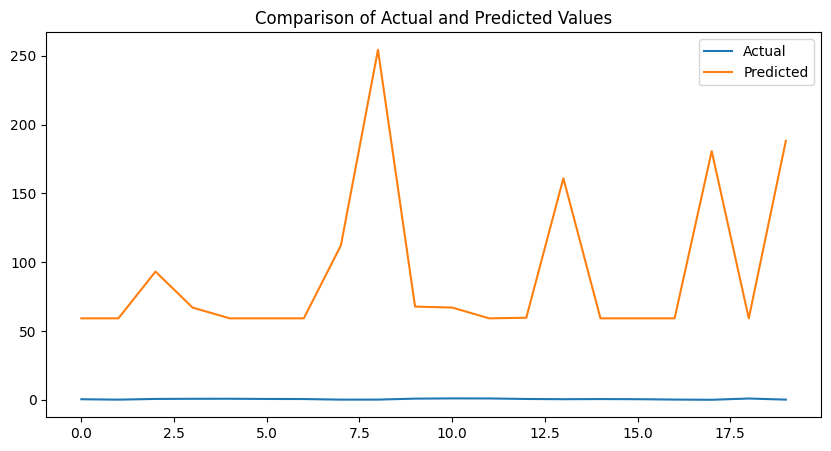

Small values in y_test: [0.39038988 0.10466264 0.61422529 0.72260227 0.75583189 0.5969954
 0.53765502 0.10957901 0.12850184 0.83306573 0.99917331 0.96186494
 0.58688842 0.42372952 0.51701017 0.42364149 0.14724261 0.00342446
 0.92606701 0.1163729 ]
RMSE: 107.38750338837205
MAE: 91.638426117417


In [ ]:
import matplotlib.pyplot as plt

# Plotting y_test and sample_predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(sample_predictions, label='Predicted')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

# Check for small values in y_test
print("Small values in y_test:", y_test[y_test < 1])

# Use other error metrics for comparison
rmse = np.sqrt(mean_squared_error(y_test, sample_predictions))
mae = mean_absolute_error(y_test, sample_predictions)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


In [ ]:
# Set a lower threshold to exclude extremely small values but still retain some
threshold = 0.01  # Adjust as needed based on your dataset
mask = y_test >= threshold  # Exclude values smaller than the threshold

# Check if the mask has any valid values
if np.any(mask):  # Ensure there's at least one value passing the filter
    filtered_mape = mean_absolute_percentage_error(y_test[mask], sample_predictions[mask]) * 100
    print(f'MAPE (after filtering small values): {filtered_mape}%')
else:
    print("No values in y_test passed the threshold filter. Consider adjusting the threshold.")


MAPE (after filtering small values): 38217.07471660701%


In [ ]:
def smape(A, F):
    return 100 * np.mean(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

# Calculate SMAPE for your predictions
smape_value = smape(y_test, sample_predictions)
print(f'SMAPE: {smape_value}%')


SMAPE: 197.03748485291607%


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test, sample_predictions))
mae = mean_absolute_error(y_test, sample_predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


RMSE: 107.38750338837205
MAE: 91.638426117417


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(XGBRegressor(objective='reg:squarederror'), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
print(f'Cross-validated MAE: {-scores.mean()}')


Cross-validated MAE: 0.24722196976084146


In [ ]:
# Refit the model with best parameters
final_model = XGBRegressor(objective='reg:squarederror',
                           learning_rate=0.1,
                           max_depth=3,
                           n_estimators=50)

final_model.fit(X_train, y_train)
final_predictions = final_model.predict(X_test)

# Evaluate the final model
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
final_mae = mean_absolute_error(y_test, final_predictions)

print(f'Final RMSE: {final_rmse}')
print(f'Final MAE: {final_mae}')


Final RMSE: 0.3767740428455443
Final MAE: 0.31317078896021416


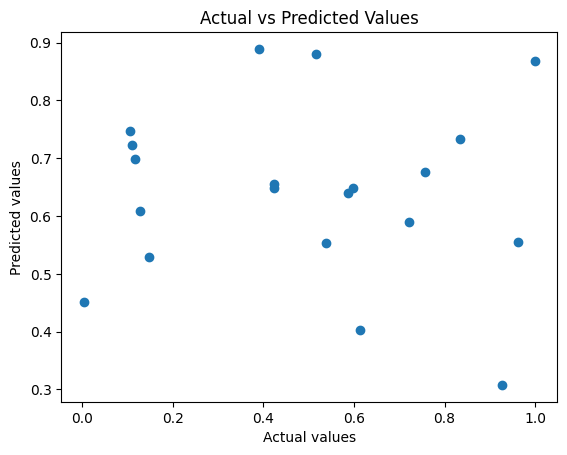

In [ ]:
plt.scatter(y_test, final_predictions)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.show()


In [ ]:
param_grid = {
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

grid_search = GridSearchCV(XGBRegressor(objective='reg:squarederror',
                                        learning_rate=0.1,
                                        max_depth=3,
                                        n_estimators=50),
                           param_grid, cv=5, scoring='neg_mean_absolute_error')

grid_search.fit(X_train, y_train)
print("Best advanced parameters:", grid_search.best_params_)


Best advanced parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'subsample': 1.0}


In [ ]:
import joblib
joblib.dump(final_model, 'final_xgboost_model.pkl')


['final_xgboost_model.pkl']

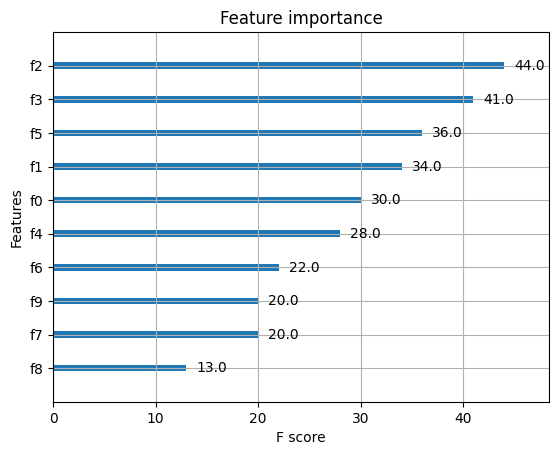

In [ ]:
xgb.plot_importance(final_model)
plt.show()


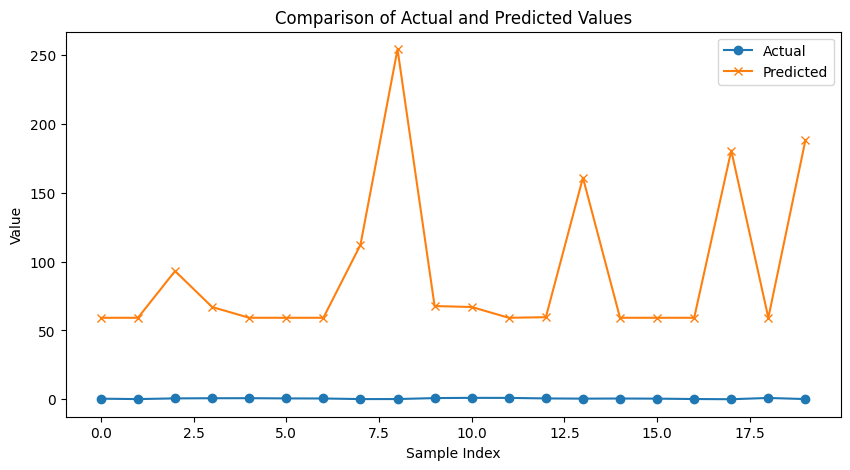

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(sample_predictions, label='Predicted', marker='x')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
!pip install --upgrade xgboost


In [ ]:
import xgboost as xgb
print(xgb.__version__)


2.1.1


In [ ]:
print(df_cleaned.columns)



Index(['ObservationDate', 'Province/State', 'Country/Region', 'Last Update',
       'Confirmed', 'Deaths', 'Recovered', 'New Cases', 'New Deaths', 'Days',
       'Day', 'Month', 'Year', 'Confirmed_Lag1', 'Confirmed_Lag2'],
      dtype='object')


In [ ]:
# Check the columns to ensure 'ObservationDate' exists
print(df_cleaned.columns)

# Convert 'ObservationDate' to datetime if not already done
df_cleaned['ObservationDate'] = pd.to_datetime(df_cleaned['ObservationDate'])

# Extract features from the date
df_cleaned['Day'] = df_cleaned['ObservationDate'].dt.day
df_cleaned['Month'] = df_cleaned['ObservationDate'].dt.month
df_cleaned['Year'] = df_cleaned['ObservationDate'].dt.year

# Create lagged features for confirmed cases
df_cleaned['Confirmed_Lag1'] = df_cleaned['Confirmed'].shift(1)
df_cleaned['Confirmed_Lag2'] = df_cleaned['Confirmed'].shift(2)

# Drop any rows with NaN values after creating new features
df_cleaned = df_cleaned.dropna()

# Proceed with your model training


Index(['ObservationDate', 'Province/State', 'Country/Region', 'Last Update',
       'Confirmed', 'Deaths', 'Recovered', 'New Cases', 'New Deaths', 'Days',
       'Day', 'Month', 'Year', 'Confirmed_Lag1', 'Confirmed_Lag2'],
      dtype='object')


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
}

random_search = RandomizedSearchCV(xgb.XGBRegressor(), param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5)
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='neg_mean_squared_error')

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
}

grid_search_xgb = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'),
                                param_grid=param_grid_xgb,
                                scoring='neg_mean_squared_error',
                                cv=5, n_jobs=-1)

grid_search_xgb.fit(X_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_
print(f'Best Parameters: {grid_search_xgb.best_params_}')


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.6}


In [ ]:
residuals = y_test - final_predictions_xgb
plt.figure(figsize=(10, 5))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()


NameError: name 'y_test' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df_cleaned is your cleaned dataframe and 'Confirmed' is your target variable
X = df_cleaned.drop(['Confirmed'], axis=1)  # Features
y = df_cleaned['Confirmed']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'df_cleaned' is not defined

In [ ]:
import pandas as pd

# Load your dataset (update the path to your dataset)
df = pd.read_csv('path/to/your/dataset.csv')

# Perform any necessary cleaning steps
# For example: Removing NaN values, converting datatypes, etc.
df_cleaned = df.dropna()  # Simple example


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/your/dataset.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
# Replace with your actual file path
file_path = "C:\Users\Kumud Agarwal\Downloads\covid_19_data.csv (1).zip" # Use double backslashes on Windows or raw string literal
df = pd.read_csv(file_path)
# Display the first few rows to confirm loading
print(df.head())


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-26-c13877d0870d>, line 2)

In [ ]:
file_path = r"C:\Users\Kumud Agarwal\Downloads\covid_19_data.csv (1).zip"



In [ ]:
file_path = "C:\\Users\\Kumud Agarwal\\Downloads\\covid_19_data.csv (1).zip"



In [ ]:
file_path = "C:/Users/Kumud Agarwal/Downloads/covid_19_data.csv (1).zip"


In [ ]:
import pandas as pd

# Use your corrected file path
file_path = r"C:\Users\Kumud Agarwal\Downloads\covid_19_data.csv (1).zip"  # Use any of the above methods

# Load the dataset
df = pd.read_csv "C:\Users\Kumud Agarwal\Downloads\covid_19_data.csv (1).zip"

# Display the first few rows to confirm loading
print(df.head())


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-32-cada757529b4>, line 7)

In [ ]:
import pandas as pd

# Use your corrected file path
file_path = r"C:\Users\Kumud Agarwal\Downloads\covid_19_data.csv (1).zip"  # Use any of the above methods

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows to confirm loading
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Kumud Agarwal\\Downloads\\covid_19_data.csv (1).zip'

In [ ]:
import zipfile

# List files in the ZIP archive
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.printdir()  # This will display the contents of the ZIP file


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Kumud Agarwal\\Downloads\\covid_19_data.csv (1).zip'

In [ ]:
file_path = r"C:\Users\Kumud Agarwal\Downloads\covid_19_data.csv (1).zip"


In [ ]:
import os

# List files in the Downloads directory
downloads_path = r"C:\Users\Kumud Agarwal\Downloads"
files = os.listdir(downloads_path)
print(files)  # This will print all files in the Downloads directory


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Kumud Agarwal\\Downloads'

In [ ]:
import pandas as pd
import zipfile
import os

# Specify the path to your ZIP file (using raw string to avoid escape errors)
file_path = r"C:\Users\Kumud Agarwal\Downloads\covid_19_data.csv (1).zip"

# Check if the ZIP file exists
if os.path.exists(file_path):
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        # List files in the ZIP archive
        zip_files = zip_ref.namelist()  # Get the list of files inside the ZIP
        print("Files in the ZIP:", zip_files)  # Print the list of files

        # Assuming there is a CSV file, read it
        for csv_file in zip_files:
            if csv_file.endswith('.csv'):
                with zip_ref.open(csv_file) as my_file:
                    df = pd.read_csv(my_file)  # Load the CSV file into a DataFrame
                    print(df.head())  # Display the first few rows
else:
    print("The specified file does not exist.")


The specified file does not exist.


In [ ]:
import pandas as pd
import zipfile


In [ ]:
file_path = r"C:\Users\Kumud Agarwal\Downloads\covid19 data.zip"


In [ ]:
# Open the ZIP file
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    # List the contents of the ZIP file to see what files it contains
    zip_ref.printdir()

    # Extract all the files
    zip_ref.extractall("C:\\Users\\Kumud Agarwal\\Downloads\\extracted_files")  # Specify a directory for extraction

# Now load the dataset
# Adjust the filename below based on what you find in the ZIP
df = pd.read_csv(r"C:\Users\Kumud Agarwal\Downloads\extracted_files\covid_19_data.csv")  # Change the filename if needed


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Kumud Agarwal\\Downloads\\covid19 data.zip'

In [ ]:
C:\Users\Kumud Agarwal\Downloads\covid19 data.zip


SyntaxError: unexpected character after line continuation character (<ipython-input-41-b0c8060f8866>, line 1)

In [ ]:
import pandas as pd
import zipfile
import os

# Specify the path to your ZIP file
file_path = r"C:\Users\Kumud Agarwal\Downloads\covid19 data.zip"

# Check if the ZIP file exists
if os.path.isfile(file_path):
    print("File exists.")

    # Open the ZIP file
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.printdir()  # List the contents of the ZIP file
        zip_ref.extractall(r"C:\Users\Kumud Agarwal\Downloads\extracted_files")  # Extract files

    # Load the dataset (replace with actual CSV file name if different)
    df = pd.read_csv(r"C:\Users\Kumud Agarwal\Downloads\extracted_files\covid_19_data.csv")  # Adjust filename if necessary

    # Display the first few rows to confirm loading
    print(df.head())
else:
    print("File does not exist. Please check the path.")



File does not exist. Please check the path.


In [ ]:
file_path = r"C:\Users\Kumud Agarwal\Downloads\covid19 data.zip"  # Use raw string to avoid escape characters


In [ ]:
import zipfile
import os

file_path = r"C:\Users\Kumud Agarwal\Downloads\covid19 data.zip"  # Path to your ZIP file

# Check if the file exists
if os.path.isfile(file_path):
    print("File exists.")

    # Open the ZIP file
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.printdir()  # List the contents of the ZIP file
        zip_ref.extractall(r"C:\Users\Kumud Agarwal\Downloads\extracted")  # Extract contents to a folder
        print("Files extracted successfully.")
else:
    print("File does not exist. Please check the path.")


File does not exist. Please check the path.


In [ ]:
import pandas as pd

# Load the dataset (update this with the actual CSV file name)
csv_file_path = r"C:\Users\Kumud Agarwal\Downloads\extracted\covid19_data.csv"  # Update with your CSV file name
df = pd.read_csv(csv_file_path)

# Display the first few rows to confirm loading
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Kumud Agarwal\\Downloads\\extracted\\covid19_data.csv'

In [ ]:
import os

file_path = r"C:\Users\Kumud Agarwal\Downloads\covid19 data.zip"  # Use raw string

# Check if the file exists at the given path
if os.path.isfile(file_path):
    print("File exists.")
else:
    print("File does not exist. Please check the path.")


File does not exist. Please check the path.


In [ ]:
from google.colab import files
import zipfile
import os
import pandas as pd

# Step 1: Upload the zip file
uploaded = files.upload()

# Step 2: Extract the zip file
zip_file_name = 'covid_19_data.csv (1).zip'
extraction_path = 'covid_data'
os.makedirs(extraction_path, exist_ok=True)

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# List the files in the extraction directory
extracted_files = os.listdir(extraction_path)
print("Extracted files:", extracted_files)

# Step 3: Load the CSV file
csv_file_path = os.path.join(extraction_path, 'covid_19_data.csv')  # Change the name if needed
df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset
print(df.head())


Saving covid19 data.zip to covid19 data.zip


FileNotFoundError: [Errno 2] No such file or directory: 'covid_19_data.csv (1).zip'

In [ ]:
from google.colab import files

# Upload file
uploaded = files.upload()

# Once the file is uploaded, you can list the files to verify the upload
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")


Saving covid19 data.zip to covid19 data (1).zip
Uploaded file: covid19 data (1).zip


In [ ]:
import zipfile
import os

# Assume the uploaded file is 'covid19 data.zip'
file_name = 'covid19 data.zip'  # Update with your file name

# Extract the ZIP file
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall('extracted_folder')

# List the contents of the extracted folder
print("Files extracted to 'extracted_folder':", os.listdir('extracted_folder'))


Files extracted to 'extracted_folder': ['covid_19_data.csv']


In [ ]:
import pandas as pd

# Update the file path to the actual CSV file name and path
# Assuming your CSV file is in 'extracted_folder/covid_19_data.csv'
df = pd.read_csv('extracted_folder/covid_19_data.csv')

# Display the first few rows to check
print(df.head())

   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  


In [ ]:
import pandas as pd

# Load the dataset (update the path if necessary)
df = pd.read_csv('extracted_folder/covid_19_data.csv')

# Check the first few rows of the dataset
print(df.head())


   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  


In [ ]:
# Example of data cleaning steps

# Check for missing values
print(df.isnull().sum())

# Drop unnecessary columns if needed (assuming certain columns are not relevant)
df_cleaned = df.drop(columns=['SNo', 'Last Update', 'Province/State'])

# Fill missing values or drop rows with missing data
df_cleaned = df_cleaned.dropna()

# Check the cleaned data
print(df_cleaned.head())


SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64
  ObservationDate  Country/Region  Confirmed  Deaths  Recovered
0      01/22/2020  Mainland China        1.0     0.0        0.0
1      01/22/2020  Mainland China       14.0     0.0        0.0
2      01/22/2020  Mainland China        6.0     0.0        0.0
3      01/22/2020  Mainland China        1.0     0.0        0.0
4      01/22/2020  Mainland China        0.0     0.0        0.0


In [ ]:
# Features and target split
X = df_cleaned.drop(['Confirmed'], axis=1)  # Features (drop the target column)
y = df_cleaned['Confirmed']  # Target variable

# Display the shape of X and y
print(f'Features shape: {X.shape}, Target shape: {y.shape}')


Features shape: (306429, 4), Target shape: (306429,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the splits
print(f'Train features shape: {X_train.shape}, Test features shape: {X_test.shape}')


Train features shape: (245143, 4), Test features shape: (61286, 4)


In [ ]:
import xgboost as xgb

# Use the best parameters from GridSearchCV if available
best_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.6)

# Train the model on the training data
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_xgb_model.predict(X_test)


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:ObservationDate: object, Country/Region: object

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# ... (your previous code for loading and cleaning data) ...

# Features and target split
X = df_cleaned.drop(['Confirmed'], axis=1)
y = df_cleaned['Confirmed']

# --- Changes start here ---
# Convert 'ObservationDate' to datetime objects and extract numerical features
X['ObservationDate'] = pd.to_datetime(X['ObservationDate'])
X['Year'] = X['ObservationDate'].dt.year
X['Month'] = X['ObservationDate'].dt.month
X['Day'] = X['ObservationDate'].dt.day
X = X.drop(columns=['ObservationDate'])  # Drop the original date column

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


NameError: name 'y_pred' is not defined

In [ ]:
import xgboost as xgb

# Use the best parameters from GridSearchCV if available
best_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.6)

# Train the model on the training data
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_xgb_model.predict(X_test)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:ObservationDate: object, Country/Region: object

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# ... (your previous code for loading and cleaning data) ...

# Features and target split
X = df_cleaned.drop(['Confirmed'], axis=1)
y = df_cleaned['Confirmed']

# --- Changes start here ---
# Convert 'ObservationDate' to datetime objects and extract numerical features
X['ObservationDate'] = pd.to_datetime(X['ObservationDate'])
X['Year'] = X['ObservationDate'].dt.year
X['Month'] = X['ObservationDate'].dt.month
X['Day'] = X['ObservationDate'].dt.day
X = X.drop(columns=['ObservationDate'])  # Drop the original date column


# Assuming 'Country/Region' is a categorical feature, encode it using LabelEncoder
label_encoder = LabelEncoder()
X['Country/Region'] = label_encoder.fit_transform(X['Country/Region'])
# --- Changes end here ---

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the splits
print(f'Train features shape: {X_train.shape}, Test features shape: {X_test.shape}')

# Use the best parameters from GridSearchCV if available
best_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.6)

# Train the model on the training data
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_xgb_model.predict(X_test)

Train features shape: (245143, 6), Test features shape: (61286, 6)


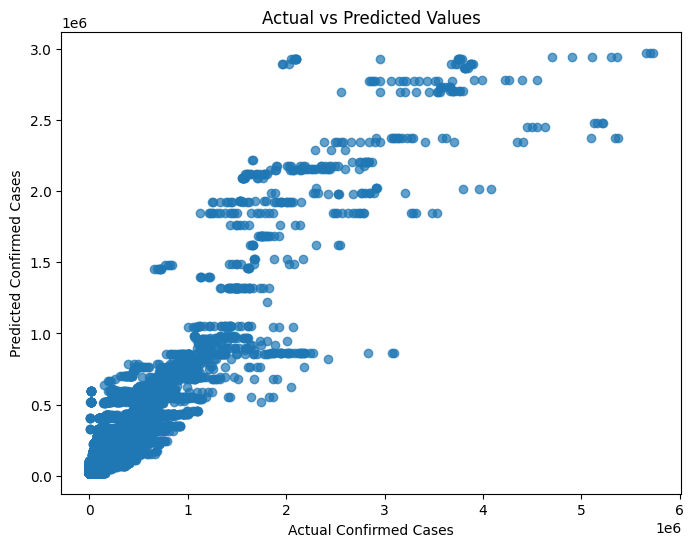

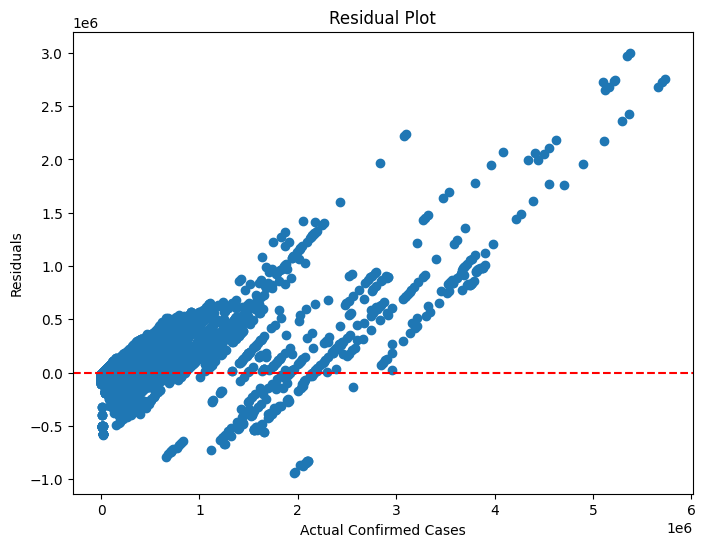

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Confirmed Cases')
plt.ylabel('Predicted Confirmed Cases')
plt.title('Actual vs Predicted Values')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Confirmed Cases')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(best_xgb_model, 'xgb_covid19_model.pkl')

# To load the model in the future
# best_xgb_model = joblib.load('xgb_covid19_model.pkl')


['xgb_covid19_model.pkl']

In [ ]:
!pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.1 MB/s eta 0:00:00


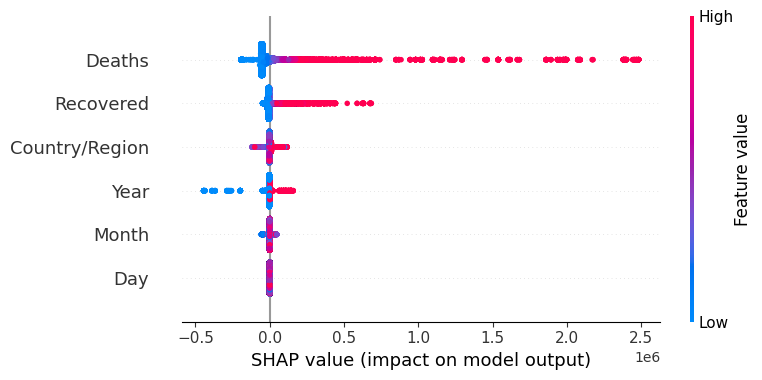

In [ ]:
import shap

# Create a SHAP explainer
explainer = shap.Explainer(best_xgb_model)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Plot the summary plot for feature importance
shap.summary_plot(shap_values, X_test)


<Figure size 1000x500 with 0 Axes>

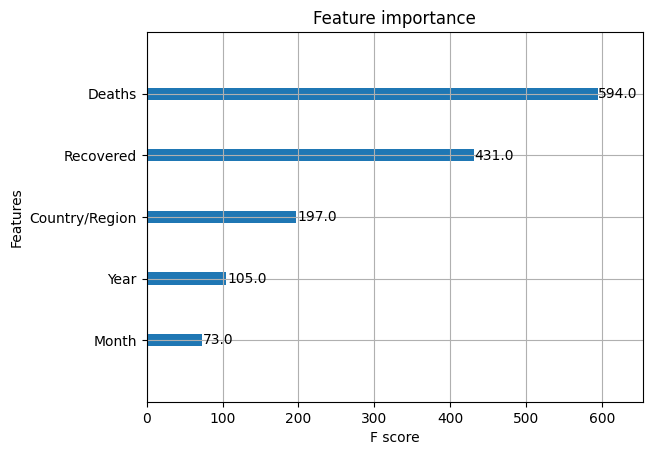

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot the feature importance using XGBoost's built-in method
plt.figure(figsize=(10, 5))
plot_importance(best_xgb_model, importance_type='weight')  # You can also use 'gain' or 'cover'
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5]
}

random_search_xgb = RandomizedSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'),
                                       param_distributions=param_dist,
                                       n_iter=50,  # Number of combinations to try
                                       scoring='neg_mean_squared_error',
                                       cv=5, n_jobs=-1, verbose=2)

random_search_xgb.fit(X_train, y_train)
best_random_model = random_search_xgb.best_estimator_

print(f'Best Parameters: {random_search_xgb.best_params_}')


Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: 

In [ ]:
!pip install hyperopt


In [ ]:
import pandas as pd
import numpy as np
from hyperopt import hp, tpe, Trials, fmin
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
# Load your dataset
df = pd.read_csv("C:\Users\Kumud Agarwal\Downloads\covid_19_data.csv")

# Prepare your features and target variable
X = df.drop('Confirmed', axis=1)  # Features
y = df['Confirmed']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-82-625046cc24dd>, line 2)